## STEP 1. Visualisation

[-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
[0.49181818 0.53830303 0.58478788 0.63127273 0.67775758 0.72424242
 0.77072727 0.81721212 0.86369697 0.91018182]


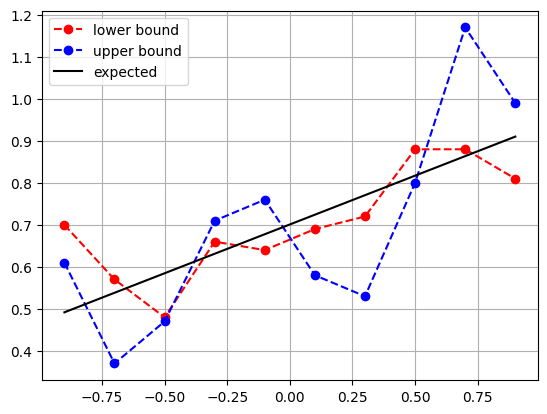

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as ss

x_axis = [round(-1 - 0.1 + 0.2*i, 1) for i in range(1, 11)]
print(x_axis)

eta_1 = np.array([0.70, 0.57, 0.48, 0.66, 0.64, 0.69, 0.72, 0.88, 0.88, 0.81])
eta_2 = np.array([0.61, 0.37, 0.47, 0.71, 0.76, 0.58, 0.53, 0.80, 1.17, 0.99])

exp = np.array([0.701 + 0.23242424*x for x in x_axis])
print(exp)

plt.plot(x_axis, eta_1, 'ro--', label = 'lower bound')
plt.plot(x_axis, eta_2, 'bo--', label = 'upper bound')
plt.plot(x_axis, exp, color = 'black', label = 'expected')
plt.legend()
plt.grid(True)
plt.show()

* As we can see the parameter <b>b</b> is not small so we can recognize it as a <b>sine curve</b>

## STEP 2. LSE for $a$, $b$, $\sigma^2$

In [ ]:
X = np.concatenate((x_axis, x_axis))
eta = np.concatenate((eta_1, eta_2))

F=[1 for i in range(20)]
F=np.vstack([F, X])


F=F.transpose()
FF=F.transpose()
B=np.matmul(FF,F)
BB=np.linalg.inv(B)
res=np.matmul(BB,FF)
res=np.matmul(res, eta)

print(BB)
print(res)

n = 20
m = 2



[[5.00000000e-02 8.41078049e-19]
 [8.41078049e-19 1.51515152e-01]]
[0.701      0.23242424]


In [ ]:
PHI_times_LSE = np.matmul(F,res)

RSS = sum((eta - PHI_times_LSE)**2)

sigma2 = RSS/(n-m)
print(f"sigma^2 = {sigma2}")
print(RSS)

sigma^2 = 0.017957845117845116
0.3232412121212121


## STEP 3. Confidence intervals for $a$, $b$, $\sigma^2$

In [ ]:
alpha = 0.05
q_l = ss.chi2.ppf(alpha/2, df = n-m)
q_r = ss.chi2.ppf(1-alpha/2, df = n-m)

print(f"Confidence interval for sigma^2 is ({RSS/q_r}, {RSS/q_l})")

Confidence interval for sigma^2 is (0.010253039775324348, 0.03927240671412397)


In [ ]:
#B_t = np.array(np.vstack((x_axis, x_axis)))
#B = np.transpose(B)
#print(B)

q = ss.t.ppf(1-alpha/2, df = n-m)
s = math.sqrt(sigma2)

'''left_a = a - q*s*math.sqrt(1/20)
right_a = a + q*s*math.sqrt(1/20)

left_b = b - q*s*math.sqrt(1/10)
right_b = b + q*s*math.sqrt(1/10)'''

ccc=np.zeros(m)
for i in range(m):
  ccc[i]=BB[i][i]
l_a=np.zeros(m)
r_a=np.zeros(m)
l_a=res-q*s*np.sqrt(ccc)
r_a=res+q*s*np.sqrt(ccc)

print(l_a)
print(r_a)
print(ccc)


[0.63804619 0.12283572]
[0.76395381 0.34201277]
[0.05       0.15151515]


## STEP 4. Confidence interval for the value of the function at -0.5

In [ ]:
left = 0.665 - q*s*math.sqrt(0.15)
right = 0.665 + q*s*math.sqrt(0.15)

print(f"Confidence interval for the value of the function at -0.5 is:\n({left}, {right})")

Confidence interval for the value of the function at -0.5 is:
(0.5645911351279723, 0.7654088648720277)


In [ ]:
2*math.sqrt(sigma2)

0.24680075637415685

In [ ]:
'''theta = res
B_inv = np.array([1/20, 1/10])
down = np.zeros(10)
up = np.zeros(10)
for i in range(0, 10):
    l = np.array([1, math.sin(math.pi*x_axis[i])])
    new_l = np.array([l[0]/20, l[1]/10])
    SQRT = math.sqrt(np.dot(new_l, l))
    centre = np.dot(l, theta)
    down[i] = centre - q*s*SQRT
    up[i] = centre + q*s*SQRT
    print(f"i = {i}\n({down[i]}, {up[i]})\n")
'''
down = np.zeros(10)
up = np.zeros(10)
for i in range(10):
  l=np.array([1, x_axis[i]])
  U=np.matmul(l, BB)
  U=np.matmul(U, l.transpose())
  centre=np.matmul(l, res)
  up[i]=centre+q*s*math.sqrt(U)+2*s
  down[i]=centre-q*s*math.sqrt(U)-2*s
print(up)
print(down)
print(U)



[0.87684048 0.90555343 0.93626178 0.97030798 1.00967189 1.05615673
 1.10976252 1.16868602 1.23094737 1.29520411]
[0.10679589 0.17105263 0.23331398 0.29223748 0.34584327 0.39232811
 0.43169202 0.46573822 0.49644657 0.52515952]
0.17272727272727278


[0.49181818 0.53830303 0.58478788 0.63127273 0.67775758 0.72424242
 0.77072727 0.81721212 0.86369697 0.91018182]


<ipython-input-49-dbe1b9e9cec9>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, down, 'ro--', label = "floor confidence bound", color='g')
<ipython-input-49-dbe1b9e9cec9>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_axis, up, 'ro--', label = "ceil confidence bound", color='g')


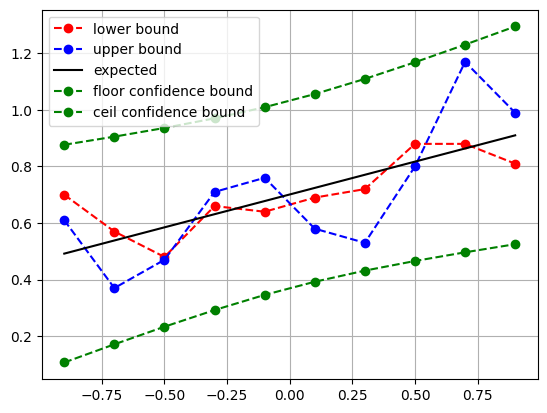

[-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]


In [ ]:
eta_1 = np.array([0.70, 0.57, 0.48, 0.66, 0.64, 0.69, 0.72, 0.88, 0.88, 0.81])
eta_2 = np.array([0.61, 0.37, 0.47, 0.71, 0.76, 0.58, 0.53, 0.80, 1.17, 0.99])

exp = np.array([0.701 + 0.23242424*x for x in x_axis])
print(exp)

plt.plot(x_axis, eta_1, 'ro--', label = 'lower bound')
plt.plot(x_axis, eta_2, 'bo--', label = 'upper bound')
plt.plot(x_axis, exp, color = 'black', label = 'expected')
plt.plot(x_axis, down, 'ro--', label = "floor confidence bound", color='g')
plt.plot(x_axis, up, 'ro--', label = "ceil confidence bound", color='g')
plt.legend()
plt.grid(True)
plt.show()
print(x_axis)

## STEP 5. Adequacy hypothesis testing

In [ ]:
print(eta_1)
print(eta_2)
eta_mean = [0.5*(eta_1[i] + eta_2[i]) for i in range(10)]
print(eta_mean)
sum_ = 0
for i in range(10):
    sum_ += (eta_1[i] - eta_mean[i])**2 + (eta_2[i] - eta_mean[i])**2
print(sum_)

[0.7  0.57 0.48 0.66 0.64 0.69 0.72 0.88 0.88 0.81]
[0.61 0.37 0.47 0.71 0.76 0.58 0.53 0.8  1.17 0.99]
[0.655, 0.47, 0.475, 0.685, 0.7, 0.635, 0.625, 0.8400000000000001, 1.025, 0.9]
0.11809999999999994


In [ ]:
f = ss.f.ppf(1-alpha, 10-2, 20-10)
print(f)

3.071658385279037


In [ ]:
X = np.concatenate((x_axis, x_axis))
eta = np.concatenate((eta_1, eta_2))
sum_X = sum(X)
sum_Xsqr = sum([2*y**2 for y in x_axis])
x_etas = [X[i]*eta[i] for i in range(20)]
sum_x_etas = sum(x_etas)
print(sum_x_etas)
print(X)

-2.922
[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9 -0.9 -0.7 -0.5 -0.3
 -0.1  0.1  0.3  0.5  0.7  0.9]


In [ ]:
PHI_times_LSE = np.array([0.184 - 0.44*y for y in X])

RSS = sum((eta - PHI_times_LSE)**2)

print(RSS)

1.2460799999999999


In [ ]:
((1.246 - 0.25)/(10-2)) / (0.25/(20-2))

8.964

In [ ]:
X = np.concatenate((x_axis, x_axis))
eta = np.concatenate((eta_1, eta_2))

F=[1 for i in range(20)]
F=np.vstack([F, np.sin(np.pi*X)])


F=F.transpose()
FF=F.transpose()
B=np.matmul(FF,F)
BB=np.linalg.inv(B)
res=np.matmul(BB,FF)
res=np.matmul(res, eta)

print(BB)
print(res)

n = 20
m = 2

[[ 5.00000000e-02 -2.77555756e-19]
 [-2.77555756e-19  1.00000000e-01]]
[0.701      0.16421729]


In [ ]:
PHI_times_LSE = np.matmul(F,res)

RSS = sum((eta - PHI_times_LSE)**2)

sigma2 = RSS/(n-m)
print(f"sigma^2 = {sigma2}")
print(RSS)

sigma^2 = 0.022783711262383512
0.41010680272290323


In [ ]:
((0.41010680272290323 - 0.11809999999999994)/(10-2))/(0.11809999999999994/(20-10))

3.090673187160282